In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
IMAGE_SIZE=256
CHANNELS=3
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        'dataset/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
        
)

Found 1504 images belonging to 3 classes.


In [37]:
train_generator.class_indices

{'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}

In [38]:
class_names = list(train_generator.class_indices.keys())
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [6]:
for image_batch,label_batch in train_generator:
    print(image_batch[0])
    break

[[[0.38988447 0.35851192 0.4094923 ]
  [0.40833083 0.37695825 0.42793867]
  [0.4185174  0.38714486 0.43812525]
  ...
  [0.56078434 0.5372549  0.58431375]
  [0.56078434 0.5372549  0.58431375]
  [0.56078434 0.5372549  0.58431375]]

 [[0.38836208 0.35698953 0.40796992]
  [0.40711293 0.37574038 0.42672077]
  [0.41882187 0.38744932 0.4384297 ]
  ...
  [0.5671979  0.5436685  0.5907273 ]
  [0.57115614 0.54762673 0.59468555]
  [0.5751143  0.5515849  0.5986437 ]]

 [[0.38683972 0.35546714 0.40644756]
  [0.405895   0.37452245 0.42550284]
  [0.41912636 0.38775378 0.4387342 ]
  ...
  [0.617543   0.5940136  0.6410724 ]
  [0.6211966  0.5976672  0.64472604]
  [0.62485033 0.6013209  0.64837974]]

 ...

 [[0.5305023  0.51873755 0.56187487]
  [0.5301978  0.5184331  0.56157035]
  [0.52989334 0.51812863 0.5612659 ]
  ...
  [0.6553835  0.6436188  0.6867561 ]
  [0.6720431  0.6602784  0.70341563]
  [0.69159174 0.67982703 0.7229643 ]]

 [[0.5406889  0.52892417 0.5720614 ]
  [0.5419068  0.53014207 0.5732793 ]


In [7]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        'dataset/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 214 images belonging to 3 classes.


In [8]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        'dataset/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 432 images belonging to 3 classes.


In [9]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 64)        0

In [11]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [13]:
1504/32

47.0

In [14]:
214/32

6.6875

In [15]:
history = model.fit(
    train_generator,
    steps_per_epoch=47,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=6,
    verbose=1,
    epochs=20,
)

Epoch 1/20
47/47 [==============================] - 169s 3s/step - loss: 0.9126 - accuracy: 0.4927 - val_loss: 0.8964 - val_accuracy: 0.4531
Epoch 2/20
47/47 [==============================] - 111s 2s/step - loss: 0.8426 - accuracy: 0.5439 - val_loss: 0.7928 - val_accuracy: 0.5469
Epoch 3/20
47/47 [==============================] - 125s 3s/step - loss: 0.6926 - accuracy: 0.6729 - val_loss: 0.5741 - val_accuracy: 0.7500
Epoch 4/20
47/47 [==============================] - 116s 2s/step - loss: 0.4290 - accuracy: 0.8218 - val_loss: 0.2863 - val_accuracy: 0.8906
Epoch 5/20
47/47 [==============================] - 109s 2s/step - loss: 0.3867 - accuracy: 0.8537 - val_loss: 0.3212 - val_accuracy: 0.8646
Epoch 6/20
47/47 [==============================] - 106s 2s/step - loss: 0.2863 - accuracy: 0.8923 - val_loss: 0.1804 - val_accuracy: 0.9375
Epoch 7/20
47/47 [==============================] - 124s 3s/step - loss: 0.1706 - accuracy: 0.9402 - val_loss: 0.2179 - val_accuracy: 0.9010
Epoch 8/20
47

In [17]:
scores = model.evaluate(test_generator)

14/14 [==============================] - 24s 1s/step - loss: 0.0692 - accuracy: 0.9722


In [18]:
scores

[0.06917887181043625, 0.9722222089767456]

In [19]:
history

In [20]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 47}

In [21]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [22]:
type(history.history['loss'])

list

In [23]:
len(history.history['loss'])

20

In [24]:
history.history['loss'][:5]

[0.9126176834106445,
 0.8426448702812195,
 0.6925504803657532,
 0.4289538562297821,
 0.386731892824173]

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']


In [27]:
val_acc

[0.453125,
 0.546875,
 0.75,
 0.890625,
 0.8645833134651184,
 0.9375,
 0.9010416865348816,
 0.953125,
 0.9635416865348816,
 0.9583333134651184,
 0.9739583134651184,
 0.953125,
 0.9739583134651184,
 0.9583333134651184,
 0.9791666865348816,
 0.9739583134651184,
 0.9791666865348816,
 0.9322916865348816,
 0.9427083134651184,
 0.9583333134651184]

In [34]:
acc

[0.4926861822605133,
 0.5438829660415649,
 0.6728723645210266,
 0.8218085169792175,
 0.853723406791687,
 0.8922872543334961,
 0.9401595592498779,
 0.928856372833252,
 0.9541223645210266,
 0.9328457713127136,
 0.967420220375061,
 0.960106372833252,
 0.9767287373542786,
 0.9621010422706604,
 0.970079779624939,
 0.9767287373542786,
 0.9827127456665039,
 0.9621010422706604,
 0.9654255509376526,
 0.9740691781044006]

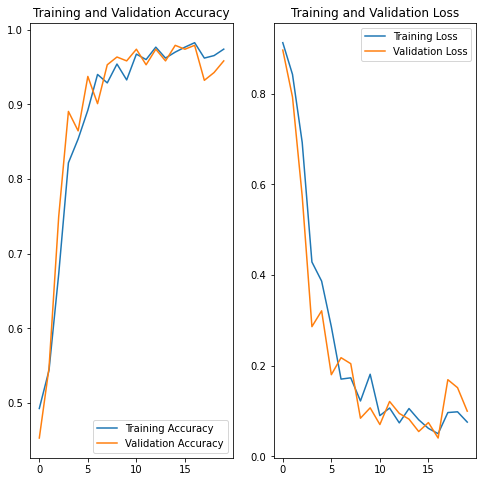

In [35]:
EPOCHS = 20

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Potato___Late_blight
1/1 [==============================] - 6s 6s/step
predicted label: Potato___Late_blight


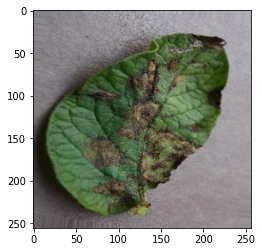

In [39]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(labels_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

In [40]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 2s 2s/step


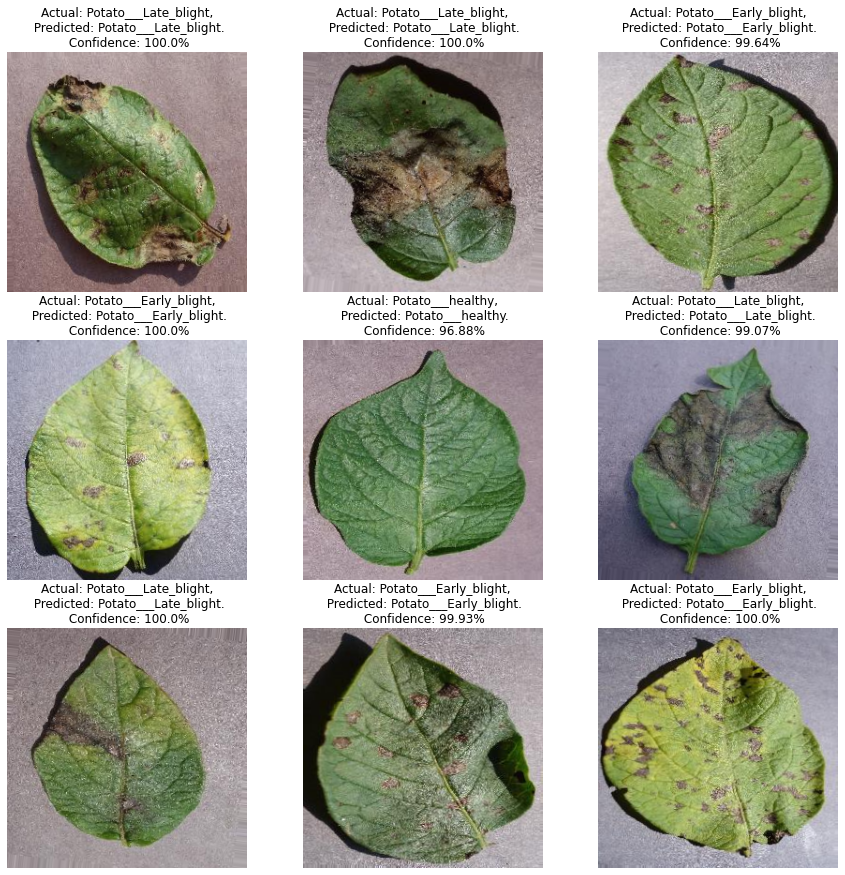

In [46]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [48]:
model.save("../potatoes1.h5")